# Logistic Regression Implementation:

In [1]:
import numpy as np
import pandas as pd

from pandas import Series, DataFrame

import scipy
from scipy.stats import spearmanr

from pylab import rcParams
import seaborn as sb
import matplotlib.pyplot as plt

import sklearn
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import preprocessing

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

In [3]:
data_train = np.genfromtxt('group6_train.dat')
display(pd.DataFrame(data_train).head(10))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,5.0,1415.0,0.0,0.0,34.0,588.0,0.0,0.0,8.0,0.0,8.0,2.0,5.0,1.0,1.0,2.0,0.0,1.0
1,2.0,28.0,0.0,0.0,73.0,2260.0,0.0,0.0,0.0,0.0,6.0,2.0,2.0,7.0,4.0,2.0,1.0,0.0
2,6.0,149.0,3.0,267.0,120.0,3934.0,0.0,0.0,8.0,0.0,11.0,2.0,2.0,4.0,2.0,2.0,1.0,0.0
3,8.0,97.0,0.0,0.0,24.0,498.0,0.0,0.0,5.0,0.0,10.0,2.0,2.0,1.0,2.0,2.0,0.0,1.0
4,2.0,21.0,1.0,802.0,48.0,2073.0,0.0,0.0,0.0,0.0,11.0,2.0,2.0,3.0,2.0,2.0,1.0,0.0
5,4.0,24.0,0.0,0.0,29.0,749.0,0.0,0.0,0.0,0.0,11.0,1.0,1.0,3.0,2.0,2.0,0.0,1.0
6,0.0,0.0,0.0,0.0,20.0,1117.0,0.0,0.0,0.0,0.0,3.0,2.0,4.0,7.0,2.0,2.0,0.0,0.0
7,1.0,75.0,0.0,0.0,20.0,1173.0,0.0,0.0,21.0,0.0,11.0,3.0,2.0,8.0,11.0,2.0,0.0,1.0
8,2.0,6.0,0.0,0.0,9.0,89.0,0.0,0.0,0.0,0.0,9.0,1.0,1.0,4.0,4.0,2.0,1.0,1.0
9,4.0,206.0,0.0,0.0,9.0,113.0,0.0,0.0,0.0,0.0,10.0,2.0,2.0,1.0,6.0,2.0,0.0,0.0


In [4]:
data_cv = np.genfromtxt('group6_cv.dat')
display(pd.DataFrame(data_cv).head(10))

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0,3.0,3.0,2.0,0.0,0.0
1,5.0,73.0,1.0,55.0,41.0,1705.0,0.0,0.0,7.0,0.0,5.0,2.0,4.0,2.0,2.0,2.0,0.0,0.0
2,14.0,160.0,6.0,1079.0,154.0,7405.0,0.0,0.0,8.0,0.0,11.0,4.0,1.0,4.0,1.0,2.0,0.0,1.0
3,8.0,203.0,0.0,0.0,116.0,3505.0,0.0,0.0,62.0,0.0,11.0,2.0,2.0,1.0,6.0,2.0,0.0,1.0
4,0.0,0.0,0.0,0.0,12.0,312.0,0.0,0.0,17.0,0.0,5.0,2.0,2.0,8.0,6.0,2.0,0.0,1.0
5,0.0,0.0,0.0,0.0,24.0,968.0,0.0,0.0,106.0,0.0,11.0,1.0,1.0,9.0,2.0,2.0,0.0,1.0
6,9.0,441.0,0.0,0.0,122.0,2577.0,0.0,0.0,75.0,0.0,11.0,1.0,1.0,1.0,2.0,2.0,0.0,1.0
7,3.0,68.0,1.0,103.0,10.0,808.0,0.0,0.0,35.0,0.0,3.0,2.0,2.0,3.0,7.0,2.0,1.0,1.0
8,2.0,561.0,2.0,31.0,95.0,4817.0,0.0,0.0,50.0,0.0,11.0,1.0,1.0,5.0,2.0,2.0,0.0,1.0
9,5.0,415.0,0.0,0.0,115.0,4424.0,0.0,0.0,13.0,0.0,8.0,2.0,4.0,4.0,1.0,2.0,1.0,1.0


In [5]:
#Set m and n
m = data_train.shape[0]
n = data_train.shape[1]-1 #The final column is not a feature; it's the target variable


#Set X and y
#I'm putting in reshapes on the single-column matrices to explicitly ensure that they
#aren't rank 1 arrays i.e. their shapes aren't weird "(m,)" but rather "(m,1)" 
X = data_train[:,0:n]
y = data_train[:,n].reshape(m,1)

#Also set X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15 AND X16
X1 = data_train[:,0].reshape(m,1)
X2 = data_train[:,1].reshape(m,1)
X3 = data_train[:,2].reshape(m,1)
X4 = data_train[:,3].reshape(m,1)
X5 = data_train[:,4].reshape(m,1)
X6 = data_train[:,5].reshape(m,1)
X7 = data_train[:,6].reshape(m,1)
X8 = data_train[:,7].reshape(m,1)
X9 = data_train[:,8].reshape(m,1)
X10= data_train[:,9].reshape(m,1)
X11= data_train[:,10].reshape(m,1)
X12= data_train[:,11].reshape(m,1)
X13= data_train[:,12].reshape(m,1)
X14= data_train[:,13].reshape(m,1)
X15= data_train[:,14].reshape(m,1)
X16= data_train[:,15].reshape(m,1)

#Now display X and y to make sure they look
#like they've been set correctly
print("X:")
display(pd.DataFrame(X).head(10))

print("\ny:")
display(pd.DataFrame(y).head(10))

print("\nX1:")
display(pd.DataFrame(X1).head(10))

print("\nX2:")
display(pd.DataFrame(X2).head(10))

print("\nX3:")
display(pd.DataFrame(X3).head(10))

print("\nX4:")
display(pd.DataFrame(X4).head(10))

print("\nX5:")
display(pd.DataFrame(X5).head(10))

print("\nX6:")
display(pd.DataFrame(X6).head(10))

print("\nX7:")
display(pd.DataFrame(X7).head(10))

print("\nX8:")
display(pd.DataFrame(X8).head(10))

print("\nX9:")
display(pd.DataFrame(X9).head(10))

print("\nX10:")
display(pd.DataFrame(X10).head(10))

print("\nX11:")
display(pd.DataFrame(X11).head(10))

print("\nX12:")
display(pd.DataFrame(X12).head(10))

print("\nX13:")
display(pd.DataFrame(X13).head(10))

print("\nX14:")
display(pd.DataFrame(X14).head(10))

print("\nX15:")
display(pd.DataFrame(X15).head(10))

print("\nX16:")
display(pd.DataFrame(X16).head(10))

X:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,5.0,1415.0,0.0,0.0,34.0,588.0,0.0,0.0,8.0,0.0,8.0,2.0,5.0,1.0,1.0,2.0,0.0
1,2.0,28.0,0.0,0.0,73.0,2260.0,0.0,0.0,0.0,0.0,6.0,2.0,2.0,7.0,4.0,2.0,1.0
2,6.0,149.0,3.0,267.0,120.0,3934.0,0.0,0.0,8.0,0.0,11.0,2.0,2.0,4.0,2.0,2.0,1.0
3,8.0,97.0,0.0,0.0,24.0,498.0,0.0,0.0,5.0,0.0,10.0,2.0,2.0,1.0,2.0,2.0,0.0
4,2.0,21.0,1.0,802.0,48.0,2073.0,0.0,0.0,0.0,0.0,11.0,2.0,2.0,3.0,2.0,2.0,1.0
5,4.0,24.0,0.0,0.0,29.0,749.0,0.0,0.0,0.0,0.0,11.0,1.0,1.0,3.0,2.0,2.0,0.0
6,0.0,0.0,0.0,0.0,20.0,1117.0,0.0,0.0,0.0,0.0,3.0,2.0,4.0,7.0,2.0,2.0,0.0
7,1.0,75.0,0.0,0.0,20.0,1173.0,0.0,0.0,21.0,0.0,11.0,3.0,2.0,8.0,11.0,2.0,0.0
8,2.0,6.0,0.0,0.0,9.0,89.0,0.0,0.0,0.0,0.0,9.0,1.0,1.0,4.0,4.0,2.0,1.0
9,4.0,206.0,0.0,0.0,9.0,113.0,0.0,0.0,0.0,0.0,10.0,2.0,2.0,1.0,6.0,2.0,0.0



y:


,0
0,1.0
1,0.0
2,0.0
3,1.0
4,0.0
5,1.0
6,0.0
7,1.0
8,1.0
9,0.0



X1:


,0
0,5.0
1,2.0
2,6.0
3,8.0
4,2.0
5,4.0
6,0.0
7,1.0
8,2.0
9,4.0



X2:


,0
0,1415.0
1,28.0
2,149.0
3,97.0
4,21.0
5,24.0
6,0.0
7,75.0
8,6.0
9,206.0



X3:


,0
0,0.0
1,0.0
2,3.0
3,0.0
4,1.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0



X4:


,0
0,0.0
1,0.0
2,267.0
3,0.0
4,802.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0



X5:


,0
0,34.0
1,73.0
2,120.0
3,24.0
4,48.0
5,29.0
6,20.0
7,20.0
8,9.0
9,9.0



X6:


,0
0,588.0
1,2260.0
2,3934.0
3,498.0
4,2073.0
5,749.0
6,1117.0
7,1173.0
8,89.0
9,113.0



X7:


,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0



X8:


,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0



X9:


,0
0,8.0
1,0.0
2,8.0
3,5.0
4,0.0
5,0.0
6,0.0
7,21.0
8,0.0
9,0.0



X10:


,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0



X11:


,0
0,8.0
1,6.0
2,11.0
3,10.0
4,11.0
5,11.0
6,3.0
7,11.0
8,9.0
9,10.0



X12:


,0
0,2.0
1,2.0
2,2.0
3,2.0
4,2.0
5,1.0
6,2.0
7,3.0
8,1.0
9,2.0



X13:


,0
0,5.0
1,2.0
2,2.0
3,2.0
4,2.0
5,1.0
6,4.0
7,2.0
8,1.0
9,2.0



X14:


,0
0,1.0
1,7.0
2,4.0
3,1.0
4,3.0
5,3.0
6,7.0
7,8.0
8,4.0
9,1.0



X15:


,0
0,1.0
1,4.0
2,2.0
3,2.0
4,2.0
5,2.0
6,2.0
7,11.0
8,4.0
9,6.0



X16:


,0
0,2.0
1,2.0
2,2.0
3,2.0
4,2.0
5,2.0
6,2.0
7,2.0
8,2.0
9,2.0


In [6]:
#Set m and n
m_cv = data_cv.shape[0]
n_cv = data_cv.shape[1]-1 #The final column is not a feature; it's the target variable

#Set X and y
#I'm putting in reshapes on the single-column matrices to explicitly ensure that they
#aren't rank 1 arrays i.e. their shapes aren't weird "(m,)" but rather "(m,1)" 
X_cv = data_cv[:,0:n_cv]
y_cv = data_cv[:,n_cv].reshape(m_cv,1)

#Also set X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14,X15 AND X16
X1_cv = data_cv[:,0].reshape(m_cv,1)
X2_cv = data_cv[:,1].reshape(m_cv,1)
X3_cv = data_cv[:,2].reshape(m_cv,1)
X4_cv = data_cv[:,3].reshape(m_cv,1)
X5_cv = data_cv[:,4].reshape(m_cv,1)
X6_cv = data_cv[:,5].reshape(m_cv,1)
X7_cv = data_cv[:,6].reshape(m_cv,1)
X8_cv = data_cv[:,7].reshape(m_cv,1)
X9_cv = data_cv[:,8].reshape(m_cv,1)
X10_cv= data_cv[:,9].reshape(m_cv,1)
X11_cv= data_cv[:,10].reshape(m_cv,1)
X12_cv= data_cv[:,11].reshape(m_cv,1)
X13_cv= data_cv[:,12].reshape(m_cv,1)
X14_cv= data_cv[:,13].reshape(m_cv,1)
X15_cv= data_cv[:,14].reshape(m_cv,1)
X16_cv= data_cv[:,15].reshape(m_cv,1)

#Now display X and y to make sure they look
#like they've been set correctly
print("X:")
display(pd.DataFrame(X_cv).head(10))

print("\ny:")
display(pd.DataFrame(y_cv).head(10))

print("\nX1:")
display(pd.DataFrame(X1_cv).head(10))

print("\nX2:")
display(pd.DataFrame(X2_cv).head(10))

print("\nX3:")
display(pd.DataFrame(X3_cv).head(10))

print("\nX4:")
display(pd.DataFrame(X4_cv).head(10))

print("\nX5:")
display(pd.DataFrame(X5_cv).head(10))

print("\nX6:")
display(pd.DataFrame(X6_cv).head(10))

print("\nX7:")
display(pd.DataFrame(X7_cv).head(10))

print("\nX8:")
display(pd.DataFrame(X8_cv).head(10))

print("\nX9:")
display(pd.DataFrame(X9_cv).head(10))

print("\nX10:")
display(pd.DataFrame(X10_cv).head(10))

print("\nX11:")
display(pd.DataFrame(X11_cv).head(10))

print("\nX12:")
display(pd.DataFrame(X12_cv).head(10))

print("\nX13:")
display(pd.DataFrame(X13_cv).head(10))

print("\nX14:")
display(pd.DataFrame(X14_cv).head(10))

print("\nX15:")
display(pd.DataFrame(X15_cv).head(10))

print("\nX16:")
display(pd.DataFrame(X16_cv).head(10))

X:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,3.0,2.0,3.0,3.0,2.0,0.0
1,5.0,73.0,1.0,55.0,41.0,1705.0,0.0,0.0,7.0,0.0,5.0,2.0,4.0,2.0,2.0,2.0,0.0
2,14.0,160.0,6.0,1079.0,154.0,7405.0,0.0,0.0,8.0,0.0,11.0,4.0,1.0,4.0,1.0,2.0,0.0
3,8.0,203.0,0.0,0.0,116.0,3505.0,0.0,0.0,62.0,0.0,11.0,2.0,2.0,1.0,6.0,2.0,0.0
4,0.0,0.0,0.0,0.0,12.0,312.0,0.0,0.0,17.0,0.0,5.0,2.0,2.0,8.0,6.0,2.0,0.0
5,0.0,0.0,0.0,0.0,24.0,968.0,0.0,0.0,106.0,0.0,11.0,1.0,1.0,9.0,2.0,2.0,0.0
6,9.0,441.0,0.0,0.0,122.0,2577.0,0.0,0.0,75.0,0.0,11.0,1.0,1.0,1.0,2.0,2.0,0.0
7,3.0,68.0,1.0,103.0,10.0,808.0,0.0,0.0,35.0,0.0,3.0,2.0,2.0,3.0,7.0,2.0,1.0
8,2.0,561.0,2.0,31.0,95.0,4817.0,0.0,0.0,50.0,0.0,11.0,1.0,1.0,5.0,2.0,2.0,0.0
9,5.0,415.0,0.0,0.0,115.0,4424.0,0.0,0.0,13.0,0.0,8.0,2.0,4.0,4.0,1.0,2.0,1.0



y:


,0
0,0.0
1,0.0
2,1.0
3,1.0
4,1.0
5,1.0
6,1.0
7,1.0
8,1.0
9,1.0



X1:


,0
0,0.0
1,5.0
2,14.0
3,8.0
4,0.0
5,0.0
6,9.0
7,3.0
8,2.0
9,5.0



X2:


,0
0,0.0
1,73.0
2,160.0
3,203.0
4,0.0
5,0.0
6,441.0
7,68.0
8,561.0
9,415.0



X3:


,0
0,0.0
1,1.0
2,6.0
3,0.0
4,0.0
5,0.0
6,0.0
7,1.0
8,2.0
9,0.0



X4:


,0
0,0.0
1,55.0
2,1079.0
3,0.0
4,0.0
5,0.0
6,0.0
7,103.0
8,31.0
9,0.0



X5:


,0
0,1.0
1,41.0
2,154.0
3,116.0
4,12.0
5,24.0
6,122.0
7,10.0
8,95.0
9,115.0



X6:


,0
0,0.0
1,1705.0
2,7405.0
3,3505.0
4,312.0
5,968.0
6,2577.0
7,808.0
8,4817.0
9,4424.0



X7:


,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0



X8:


,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0



X9:


,0
0,0.0
1,7.0
2,8.0
3,62.0
4,17.0
5,106.0
6,75.0
7,35.0
8,50.0
9,13.0



X10:


,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
5,0.0
6,0.0
7,0.0
8,0.0
9,0.0



X11:


,0
0,2.0
1,5.0
2,11.0
3,11.0
4,5.0
5,11.0
6,11.0
7,3.0
8,11.0
9,8.0



X12:


,0
0,3.0
1,2.0
2,4.0
3,2.0
4,2.0
5,1.0
6,1.0
7,2.0
8,1.0
9,2.0



X13:


,0
0,2.0
1,4.0
2,1.0
3,2.0
4,2.0
5,1.0
6,1.0
7,2.0
8,1.0
9,4.0



X14:


,0
0,3.0
1,2.0
2,4.0
3,1.0
4,8.0
5,9.0
6,1.0
7,3.0
8,5.0
9,4.0



X15:


,0
0,3.0
1,2.0
2,1.0
3,6.0
4,6.0
5,2.0
6,2.0
7,7.0
8,2.0
9,1.0



X16:


,0
0,2.0
1,2.0
2,2.0
3,2.0
4,2.0
5,2.0
6,2.0
7,2.0
8,2.0
9,2.0


In [7]:
X_scaled = scale(X)

print("X_scaled:")
display(pd.DataFrame(X_scaled).head(10))


X_scaled:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,0.661304,6.974295,-0.440405,-0.274171,-0.076167,-0.432328,0.0,0.0,-0.205673,-0.105083,-0.033790,-0.119278,1.505114,-0.869476,-0.755214,0.456349,-0.561709
1,-0.182624,-0.348664,-0.440405,-0.274171,0.702071,0.419558,0.0,0.0,-0.496889,-0.105083,-0.638058,-0.119278,-0.209488,1.657802,-0.004591,0.456349,1.780281
2,0.942613,0.290181,1.808116,1.444706,1.639948,1.272463,0.0,0.0,-0.205673,-0.105083,0.872611,-0.119278,-0.209488,0.394163,-0.505006,0.456349,1.780281
3,1.505232,0.015636,-0.440405,-0.274171,-0.275715,-0.478183,0.0,0.0,-0.314879,-0.105083,0.570477,-0.119278,-0.209488,-0.869476,-0.505006,0.456349,-0.561709
4,-0.182624,-0.385622,0.309102,4.888896,0.203201,0.324281,0.0,0.0,-0.496889,-0.105083,0.872611,-0.119278,-0.209488,-0.027050,-0.505006,0.456349,1.780281
5,0.379995,-0.369783,-0.440405,-0.274171,-0.175941,-0.350298,0.0,0.0,-0.496889,-0.105083,0.872611,-1.242847,-0.781022,-0.027050,-0.505006,0.456349,-0.561709
6,-0.745242,-0.496496,-0.440405,-0.274171,-0.355534,-0.162802,0.0,0.0,-0.496889,-0.105083,-1.544459,-0.119278,0.933580,1.657802,-0.505006,0.456349,-0.561709
7,-0.463933,-0.100517,-0.440405,-0.274171,-0.355534,-0.134270,0.0,0.0,0.267552,-0.105083,0.872611,1.004291,-0.209488,2.079015,1.746863,0.456349,-0.561709
8,-0.182624,-0.464818,-0.440405,-0.274171,-0.575037,-0.686569,0.0,0.0,-0.496889,-0.105083,0.268343,-1.242847,-0.781022,0.394163,-0.004591,0.456349,1.780281
9,0.379995,0.591125,-0.440405,-0.274171,-0.575037,-0.674341,0.0,0.0,-0.496889,-0.105083,0.570477,-0.119278,-0.209488,-0.869476,0.495824,0.456349,-0.561709


In [8]:
X_scaled_cv = scale(X_cv)

print("X_scaled CV:")
display(pd.DataFrame(X_scaled_cv).head(10))


X_scaled CV:


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-0.795042,-0.535945,-0.500799,-0.315759,-0.766956,-0.678459,0.0,0.0,-0.512259,-0.11524,-1.822395,0.908174,-0.245173,-0.131745,-0.305351,0.467373,-0.591982
1,0.607865,-0.138067,0.218805,0.063562,0.068042,0.117148,0.0,0.0,-0.288677,-0.11524,-0.922597,-0.115366,0.796982,-0.535445,-0.536714,0.467373,-0.591982
2,3.133096,0.336117,3.816824,7.125838,2.426911,2.776949,0.0,0.0,-0.256737,-0.11524,0.876998,1.931715,-0.766250,0.271955,-0.768077,0.467373,-0.591982
3,1.449609,0.570483,-0.500799,-0.315759,1.633663,0.957085,0.0,0.0,1.468041,-0.11524,0.876998,-0.115366,-0.245173,-0.939145,0.388739,0.467373,-0.591982
4,-0.795042,-0.535945,-0.500799,-0.315759,-0.537331,-0.532870,0.0,0.0,0.030726,-0.11524,-0.922597,-0.115366,-0.245173,1.886755,0.388739,0.467373,-0.591982
5,-0.795042,-0.535945,-0.500799,-0.315759,-0.286832,-0.226760,0.0,0.0,2.873416,-0.11524,0.876998,-1.138907,-0.766250,2.290454,-0.536714,0.467373,-0.591982
6,1.730190,1.867674,-0.500799,-0.315759,1.758912,0.524051,0.0,0.0,1.883265,-0.11524,0.876998,-1.138907,-0.766250,-0.939145,-0.536714,0.467373,-0.591982
7,0.046702,-0.165319,0.218805,0.394606,-0.579081,-0.301421,0.0,0.0,0.605652,-0.11524,-1.522462,-0.115366,-0.245173,-0.131745,0.620102,0.467373,1.689241
8,-0.233879,2.521721,0.938409,-0.101960,1.195289,1.569306,0.0,0.0,1.084757,-0.11524,0.876998,-1.138907,-0.766250,0.675655,-0.536714,0.467373,-0.591982
9,0.607865,1.725964,-0.500799,-0.315759,1.612788,1.385920,0.0,0.0,-0.097035,-0.11524,-0.022800,-0.115366,0.796982,0.271955,-0.768077,0.467373,1.689241


In [9]:
LogReg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='auto', penalty = 'l2',C = 10)

y_arry = []
for i in range(m):
    
    y_arry.append(y[i][0])


LogReg.fit(X_scaled,y_arry)
print (LogReg.score(X_scaled, y_arry))


0.8165137614678899


In [10]:
y_pred = LogReg.predict(X_scaled)
from sklearn.metrics import classification_report

print(classification_report(y_arry,y_pred))


              precision    recall  f1-score   support

         0.0       0.77      0.90      0.83      1137
         1.0       0.88      0.73      0.80      1152

   micro avg       0.82      0.82      0.82      2289
   macro avg       0.83      0.82      0.82      2289
weighted avg       0.83      0.82      0.82      2289



In [11]:
y_pred_cv = LogReg.predict(X_scaled_cv)
from sklearn.metrics import classification_report

print(classification_report(y_cv,y_pred_cv))

              precision    recall  f1-score   support

         0.0       0.77      0.89      0.82       386
         1.0       0.87      0.72      0.79       377

   micro avg       0.81      0.81      0.81       763
   macro avg       0.82      0.81      0.81       763
weighted avg       0.82      0.81      0.81       763



In [12]:
from sklearn.metrics import accuracy_score

acc = accuracy_score(y_cv,y_pred_cv)
print(acc)
print("This is the accuracy ",accuracy_score(y_cv,LogReg.predict(X_scaled_cv)))

0.8073394495412844
This is the accuracy  0.8073394495412844


## Adding meaning to the results

#### Accuracy
Using logistic regression, the trained model on the test data had 83.7% accuracy(Total correct over the total test samples).

#### Precision
The model was 79% precise y = 0 (a purschase was not made) and 91% precise y = 1 (a purschase is made). The model is 84% reliable

#### Recall
The model was 93% comprehensive in finding y = 0 (a purschase was not made)  and 74% comprehensive in finding y=1 (a purschase is made). The model is 84% comprehnensive in finding cases that purchases were made.

#### F1 - score
Using logistic regression, the trained model yields a 84% f1-score


### ROC Curve

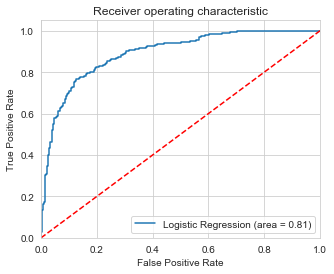

In [15]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(y_cv, LogReg.predict(X_scaled_cv))
fpr, tpr, thresholds = roc_curve(y_cv, LogReg.predict_proba(X_scaled_cv)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')

##### The receiver operating characteristic (ROC) curve 
is another common tool used with binary classifiers. The dotted line represents the ROC curve of a purely random classifier; a good classifier stays as far away from that line as possible (toward the top-left corner)